In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size 8 for version 0, 32 for version 1
version = 0

In [2]:
from google.colab import auth
from googleapiclient.discovery import build
import gspread
from google.auth.transport.requests import Request


In [3]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [9]:
data_path="/kaggle/input/"
if not os.path.exists(data_path):
    os.mkdir(data_path)

In [7]:
seed_value=42
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

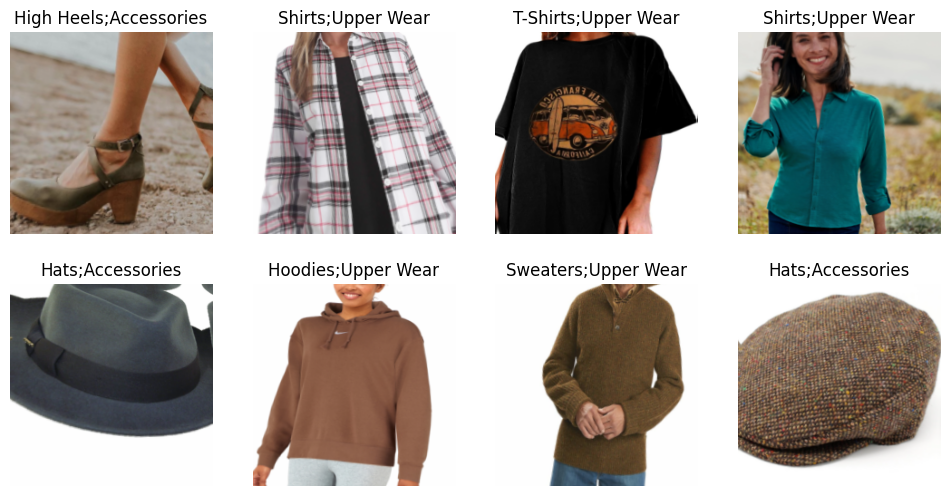

In [10]:

def get_labels_with_category(path):
    parts = list(path.parent.parts[-2:])  # Extract the last two folder names (Main Category, Item)


    return f"{parts[1]};{parts[0]}"

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Single category classification
    get_items=get_image_files,           # Get all images recursively
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # 90-10 train-validation split
    get_y=get_labels_with_category,     # Use the modified function for labels
    item_tfms=Resize(128)               # Resize images for uniformity
)

dblock=dblock.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms())

dls = dblock.dataloaders(data_path, bs = bs)

dls.train.show_batch(max_n=8, nrows=2)
torch.save(dls, "/kaggle/working/clothings_dataloader_v2.pkl")

In [11]:
model_path = "/kaggle/working/"

# Model: Resnet34

In [12]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 186MB/s] 


In [13]:
model.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.866105,0.506836,0.175000,0.825000,00:59


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.903134,0.551327,0.192857,0.807143,01:00
1,0.655328,0.489032,0.164286,0.835714,01:02
2,0.472469,0.396064,0.142857,0.857143,01:01


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
model.save("clothing-recognizer-v9-resnet32-epoch3-bs32")

Path('models/clothing-recognizer-v9-resnet32-epoch3-bs32.pth')

# Model: Resnet50

In [12]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])
model.fine_tune(3)
model.save("clothing-recognizer-v1-resnet50-epoch3-bs-8")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 217MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.018788,1.239610,0.364286,0.635714,01:12


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.418077,0.813575,0.257143,0.742857,01:18
1,1.273649,0.566631,0.196429,0.803571,01:18
2,0.879971,0.512115,0.167857,0.832143,01:20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Path('models/clothing-recognizer-v1-resnet50-epoch3-bs-8.pth')

# Model: Densenet121

In [9]:
model = vision_learner(dls, densenet121, metrics=[error_rate,accuracy])
model.fine_tune(4)
model.save("clothing-recognizer-v3-dense121-epoch4-bs32")

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.775828,1.157817,0.328571,0.671429,01:36


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.058361,0.682114,0.214286,0.785714,01:40
1,0.923892,0.597827,0.185714,0.814286,01:38
2,0.584907,0.539186,0.171429,0.828571,01:38
3,0.411623,0.523601,0.171429,0.828571,01:39


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Path('models/clothing-recognizer-v3-dense121-epoch4-bs32.pth')

# Model: squeezenet

In [11]:
model=vision_learner(dls,squeezenet1_0,metrics=[error_rate,accuracy])
model.fine_tune(3)
model.save("clothing-recognizer-v4-squeezenet10-epoch3-bs32")

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.929374,0.913822,0.264286,0.735714,01:29


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.486957,0.834320,0.314286,0.685714,01:31
1,1.308647,0.783575,0.267857,0.732143,01:31
2,1.071403,0.675703,0.257143,0.742857,01:28


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Path('models/clothing-recognizer-v4-squeezenet10-epoch3-bs32.pth')

In [12]:
model=vision_learner(dls,vgg11_bn,metrics=[error_rate,accuracy])
model.fine_tune(3)
model.save("clothing-recognizer-v5-vgg11bn-epoch3-bs32")

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:02<00:00, 235MB/s] 


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.780419,0.864286,0.282143,0.717857,01:25


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.227926,0.645815,0.221429,0.778571,01:24
1,0.896417,0.614372,0.196429,0.803571,01:24
2,0.609896,0.600194,0.200000,0.800000,01:24


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Path('models/clothing-recognizer-v5-vgg11bn-epoch3-bs32.pth')

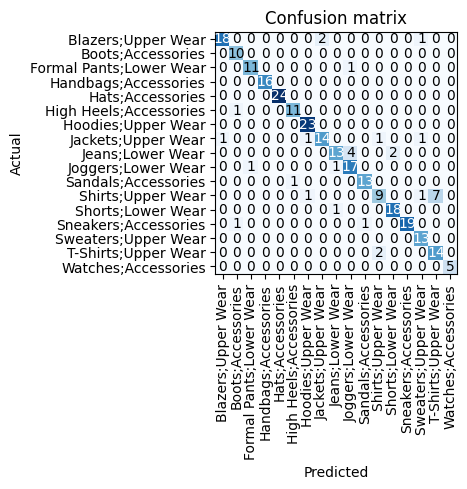

In [25]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

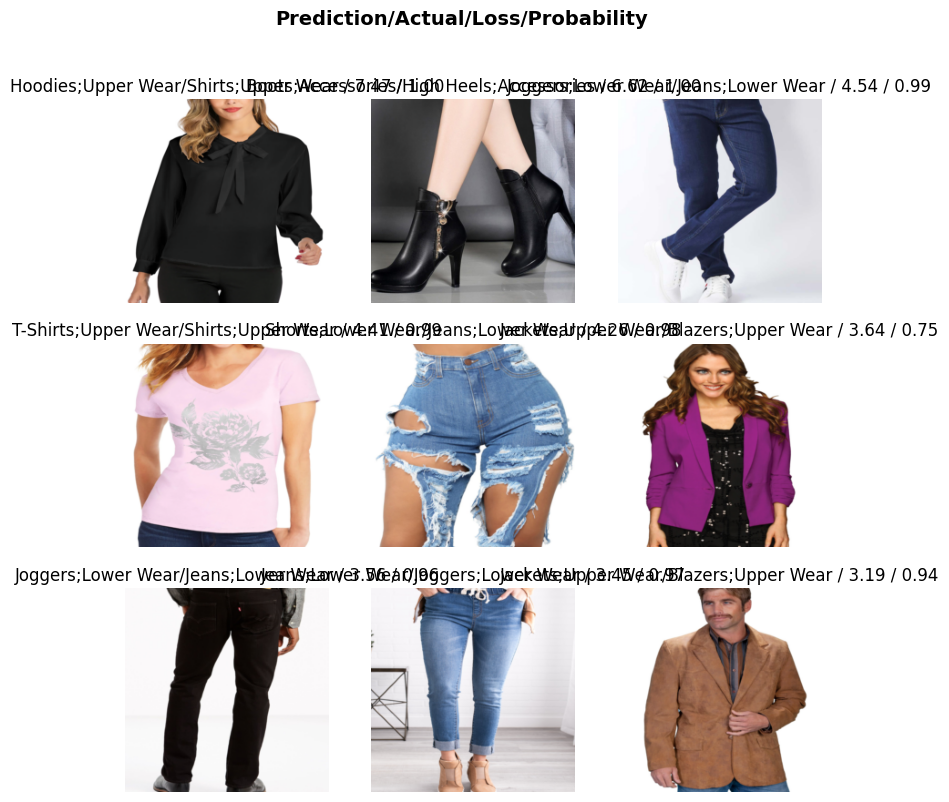

In [26]:
interp.plot_top_losses(9, nrows=3)

In [29]:
cleaner = ImageClassifierCleaner(model)
cleaner 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
model.export("clothing-recognizer-v9-resnet32-epoch3-bs32.pkl")

# Inference 1